# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X API Data Dictionary
See https://developer.x.com/en/docs/x-api/data-dictionary/introduction

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [3]:

df = pd.read_csv('x_superbowl.csv')
df.describe()

,conversation_id,author_id,id,edit_controls.edits_remaining,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,in_reply_to_user_id
count,9.377000e+03,9.377000e+03,9.377000e+03,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,1.180000e+03
mean,1.756688e+18,6.452886e+17,1.756863e+18,4.995734,160.414632,0.265970,3.108883,0.057374,0.142903,493.430308,3.334129e+17
std,7.212529e+15,7.084168e+17,1.869442e+13,0.068371,617.853377,1.720208,35.093719,0.651784,2.273449,4247.759998,5.880940e+17
min,1.378505e+18,1.299700e+04,1.756825e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.846000e+03
25%,1.756844e+18,2.176677e+08,1.756846e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.692197e+07
50%,1.756864e+18,3.230979e+09,1.756866e+18,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.949206e+08
75%,1.756879e+18,1.380642e+18,1.756880e+18,5.000000,42.000000,0.000000,0.000000,0.000000,0.000000,252.000000,7.313111e+17
max,1.756887e+18,1.756883e+18,1.756887e+18,5.000000,4760.000000,78.000000,2043.000000,27.000000,127.000000,246031.000000,1.756813e+18


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as quote_count, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [4]:
# Convert reply_count from strings to numbers.

df['public_metrics.reply_count'] = df['public_metrics.reply_count'].astype("string")
df['public_metrics.reply_count'] = pd.to_numeric(df['public_metrics.reply_count'], downcast='float')

In [5]:
# Reduce the variables in your dataframe to only those that have useful data
df = df.drop(columns=['conversation_id', 'edit_history_tweet_ids',
       'possibly_sensitive', 'reply_settings', 'entities.urls', 'entities.annotations',
       'edit_controls.edits_remaining', 'edit_controls.is_edit_eligible',
       'edit_controls.editable_until', 'geo.place_id',
       'attachments.media_keys', 'entities.mentions', 'attachments.poll_ids',
       'attachments.media_source_tweet_id', 'entities.cashtags',
       'withheld.country_codes'])

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 keywords with highest engagement

In [31]:
df.columns

Index(['created_at', 'text', 'lang', 'author_id', 'id',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.bookmark_count', 'public_metrics.impression_count',
       'entities.hashtags', 'referenced_tweets', 'in_reply_to_user_id',
       'username', 'name', 'location', 'keyword'],
      dtype='object')

<BarContainer object of 10 artists>

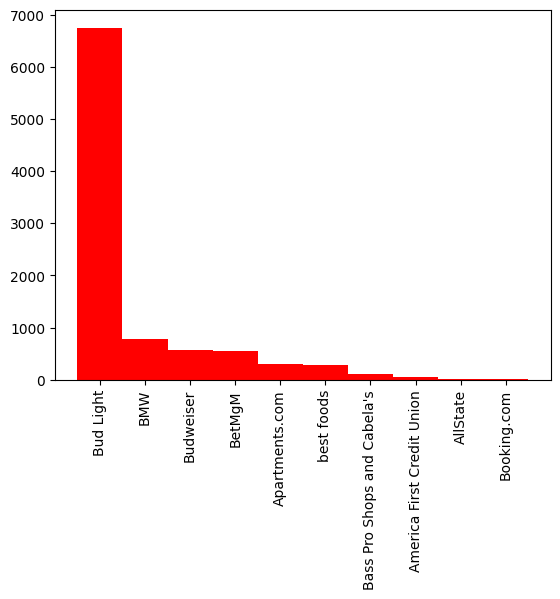

In [27]:
#chart 2: top 10 keywords with highest engagement
keys = df['keyword'].value_counts().keys()
values = df['keyword'].value_counts().values
mpl.xticks(rotation='vertical')
mpl.bar(keys, values, color ='red',
        width = 1.0)

In [22]:
keys

Index(['Bud Light', 'BMW', 'Budweiser', 'BetMgM', 'Apartments.com',
       'best foods', 'Bass Pro Shops and Cabela's',
       'America First Credit Union', 'AllState', 'Booking.com'],
      dtype='object', name='keyword')